In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
# Load the datasets (replace with actual file paths)
match_data = pd.read_csv("match_data.csv")
match_info = pd.read_csv("match_info_data.csv")

# Display basic information about datasets
print(match_data.info())
print(match_info.info())


C:\Users\rajsp\AppData\Local\Temp\ipykernel_24532\1464195641.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_data = pd.read_csv("match_data.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243817 entries, 0 to 243816
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243817 non-null  int64  
 1   season                  243817 non-null  object 
 2   start_date              243817 non-null  object 
 3   venue                   243817 non-null  object 
 4   innings                 243817 non-null  int64  
 5   ball                    243817 non-null  float64
 6   batting_team            243817 non-null  object 
 7   bowling_team            243817 non-null  object 
 8   striker                 243817 non-null  object 
 9   non_striker             243817 non-null  object 
 10  bowler                  243817 non-null  object 
 11  runs_off_bat            243817 non-null  int64  
 12  extras                  243817 non-null  int64  
 13  wides                   7652 non-null    float64
 14  noballs             

In [17]:
if 'match_id' in match_data.columns and 'match_id' in match_info.columns:
    df = pd.merge(match_data, match_info, on="match_id", how="left")
else:
    df = match_info 


In [18]:
print(df.isnull().sum())

id                  0
season              0
city               51
date                0
team1               0
team2               0
toss_winner         0
toss_decision       0
result              0
dl_applied          0
winner             19
win_by_runs         0
win_by_wickets      0
player_of_match     5
venue               0
umpire1             0
umpire2             0
umpire3             3
dtype: int64


In [19]:
df = df.drop(columns=['umpire3'], errors='ignore')

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
print(df.describe())

                 id                           date   dl_applied  win_by_runs  \
count  1.024000e+03                           1024  1024.000000  1024.000000   
mean   8.687579e+05  2015-12-10 10:56:43.124999936     0.020508    13.610352   
min    3.359820e+05            2008-04-18 00:00:00     0.000000     0.000000   
25%    5.483138e+05            2012-04-08 18:00:00     0.000000     0.000000   
50%    8.298140e+05            2015-05-17 00:00:00     0.000000     0.000000   
75%    1.216503e+06            2020-09-30 06:00:00     0.000000    19.000000   
max    1.370353e+06            2023-05-29 00:00:00     1.000000   146.000000   
std    3.528920e+05                            NaN     0.141799    23.443273   

       win_by_wickets  
count     1024.000000  
mean         3.286133  
min          0.000000  
25%          0.000000  
50%          3.000000  
75%          6.000000  
max         10.000000  
std          3.375659  


In [22]:
df.dropna(inplace=True)
print(df.isnull().sum())

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


In [23]:
print(df.head(10))

        id season        city       date                        team1  \
0  1370353   2023   Ahmedabad 2023-05-29               Gujarat Titans   
1  1370352   2023   Ahmedabad 2023-05-26               Gujarat Titans   
2  1370351   2023     Chennai 2023-05-24               Mumbai Indians   
3  1370350   2023     Chennai 2023-05-23          Chennai Super Kings   
4  1359543   2023      Mumbai 2023-05-21          Sunrisers Hyderabad   
5  1359544   2023   Bengaluru 2023-05-21  Royal Challengers Bangalore   
6  1359542   2023     Kolkata 2023-05-20         Lucknow Super Giants   
7  1359541   2023       Delhi 2023-05-20          Chennai Super Kings   
8  1359540   2023  Dharamsala 2023-05-19                 Punjab Kings   
9  1359539   2023   Hyderabad 2023-05-18          Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0          Chennai Super Kings          Chennai Super Kings         field   
1               Mumbai Indians            

In [24]:
# df = df.dropna(subset=['season'])

df = df[pd.to_numeric(df['season'], errors='coerce').notnull()]

In [25]:
with open('output.csv','w') as f:
    f.write(df.to_csv(index=False))

C:\Users\rajsp\AppData\Local\Temp\ipykernel_33752\1688621182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['season'], palette="viridis")


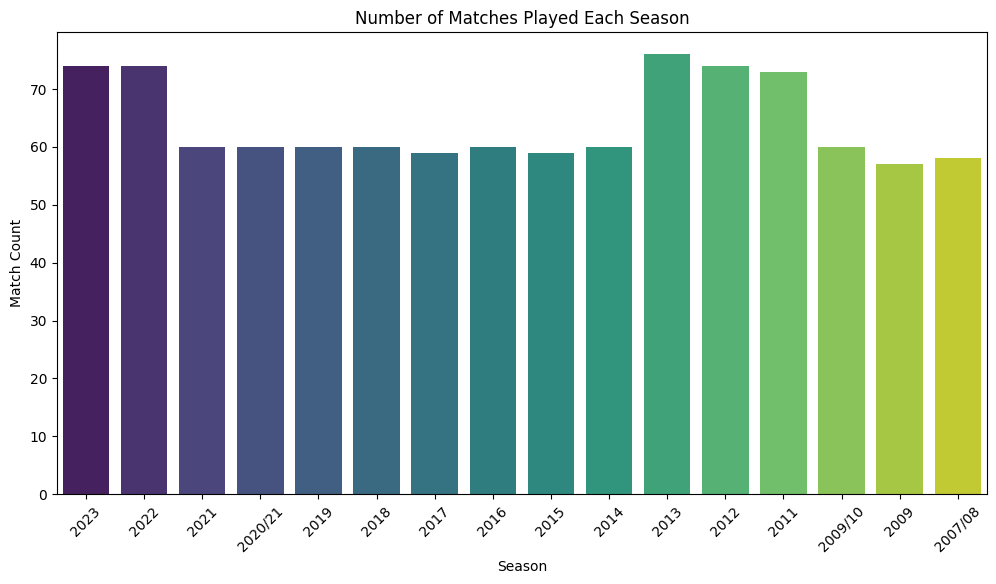

In [16]:
# 1. Number of matches played each season
plt.figure(figsize=(12, 6))
sns.countplot(x=df['season'], palette="viridis")
plt.title("Number of Matches Played Each Season")
plt.xlabel("Season")
plt.ylabel("Match Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\rajsp\AppData\Local\Temp\ipykernel_33752\1800823015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['winner'], order=df['winner'].value_counts().index, palette="coolwarm")


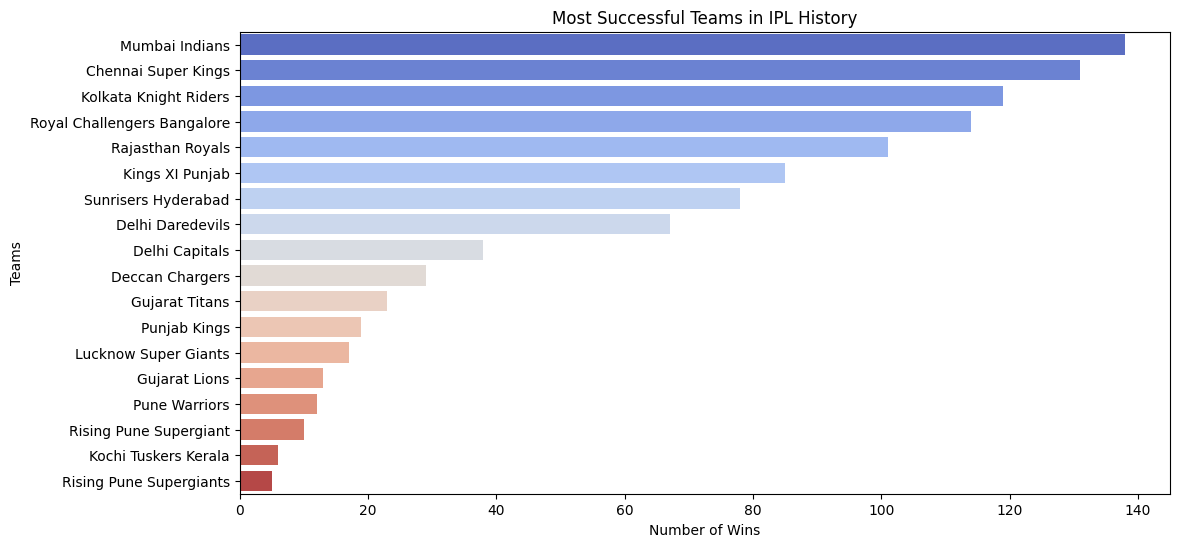

In [17]:

# 2. Most successful teams
plt.figure(figsize=(12, 6))
sns.countplot(y=df['winner'], order=df['winner'].value_counts().index, palette="coolwarm")
plt.title("Most Successful Teams in IPL History")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")
plt.show()

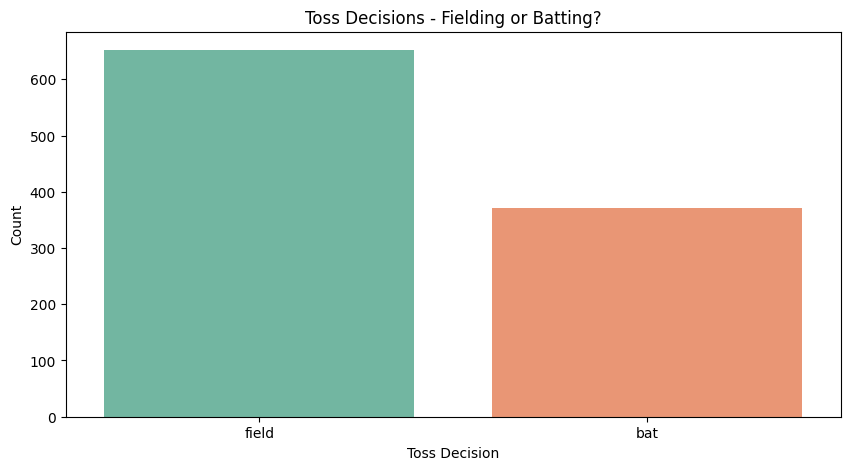

In [19]:
# 3. Toss decisions across seasons
plt.figure(figsize=(10, 5))
sns.countplot(x=df['toss_decision'], palette="Set2", hue=df['toss_decision'],legend=False)
plt.title("Toss Decisions - Fielding or Batting?")
plt.xlabel("Toss Decision")
plt.ylabel("Count")
plt.show()

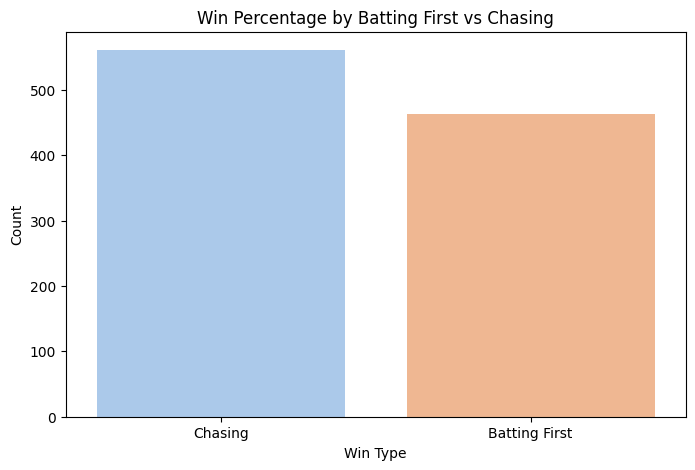

In [21]:
# 4. Win percentage by batting first or chasing
plt.figure(figsize=(8, 5))
df['win_by'] = df['win_by_runs'].apply(lambda x: 'Batting First' if x > 0 else 'Chasing')
sns.countplot(x=df['win_by'], palette="pastel", hue=df['win_by'],legend=False)
plt.title("Win Percentage by Batting First vs Chasing")
plt.xlabel("Win Type")
plt.ylabel("Count")
plt.show()

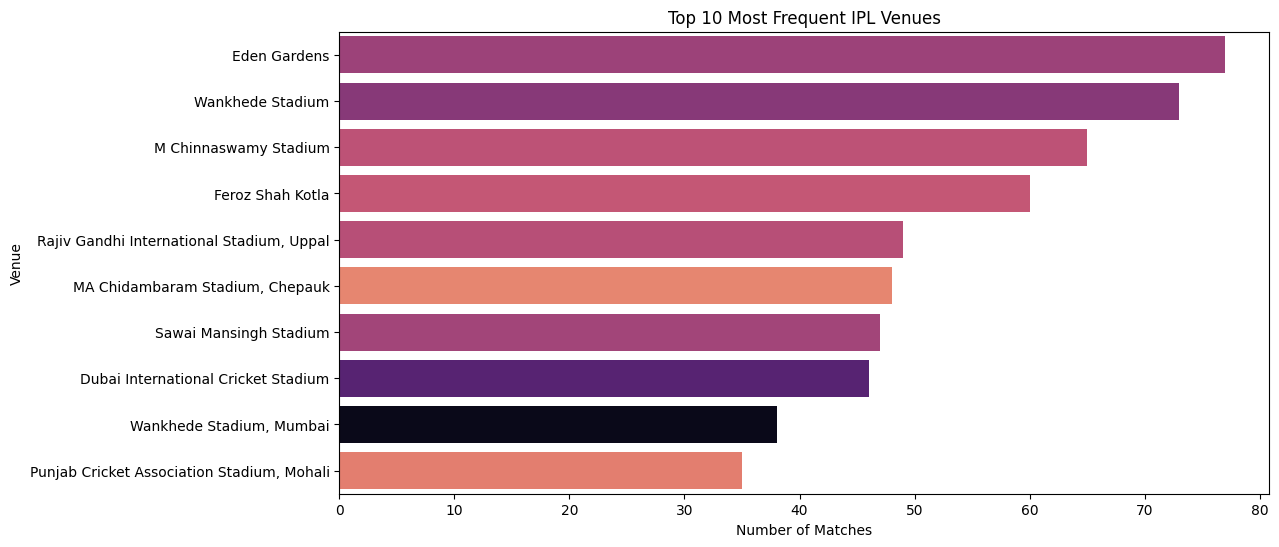

In [23]:
# 5. Most common venues
plt.figure(figsize=(12, 6))
sns.countplot(y=df['venue'], order=df['venue'].value_counts().index[:10], palette="magma", hue=df['venue'],legend=False)
plt.title("Top 10 Most Frequent IPL Venues")
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.show()